In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np

In [2]:
rows_count, col_count = 10000, 1
X, y = make_regression(n_samples=rows_count, n_features=col_count, noise=6, bias=-5, random_state=42)
ones_column = np.ones((rows_count, 1))

X = np.hstack((X, ones_column))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [3]:
from utils.linear_regression import mse, forward, train_linear_regressor

losses, parameters, gradients, current_parameters = train_linear_regressor(X_train, y_train)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 1090.302227
Epoch 1, loss: 709.411919
Epoch 2, loss: 466.235666
Epoch 3, loss: 310.981537
Epoch 4, loss: 211.860484
Epoch 5, loss: 148.577140
Epoch 6, loss: 108.174132
Epoch 7, loss: 82.378943
Epoch 8, loss: 65.910046
Epoch 9, loss: 55.395486
Epoch 10, loss: 48.682459
Epoch 11, loss: 44.396515
Epoch 12, loss: 41.660142
Epoch 13, loss: 39.913093
Epoch 14, loss: 38.797681
Epoch 15, loss: 38.085539
Epoch 16, loss: 37.630866
Epoch 17, loss: 37.340577
Epoch 18, loss: 37.155239
Epoch 19, loss: 37.036908
Epoch 20, loss: 36.961358
Epoch 21, loss: 36.913122
Epoch 22, loss: 36.882325
Epoch 23, loss: 36.862662
Epoch 24, loss: 36.850108
Epoch 25, loss: 36.842093
Epoch 26, loss: 36.836975
Epoch 27, loss: 36.833708
Epoch 28, loss: 36.831622
Epoch 29, loss: 36.830290
Epoch 30, loss: 36.829439


In [4]:
y_pred = forward(X_test, current_parameters)
y_pred = y_pred.flatten()

print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters[0]}')

Mean Squared Error: 35.246404292393606
Parameters: [31.99003257 -4.83202675]


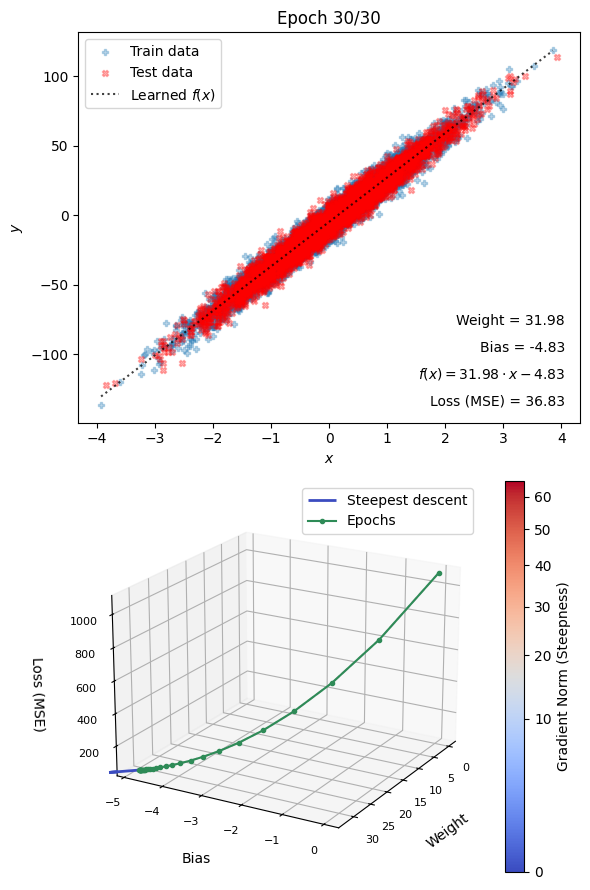

In [5]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.linear_regression import plot_2D_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_w2, text_fn, text_loss):
    text_w1.set_text(rf'Weight = {epoch_parameters[0]:.2f}')
    text_w2.set_text(rf'Bias = {epoch_parameters[1]:.2f}')
    text_fn.set_text(rf'$f(x) = {epoch_parameters[0]:.2f} \cdot x {epoch_parameters[1]:+.2f}$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='upper left')
    
    ax2.set_xlabel(r'Weight', labelpad=10)
    ax2.set_ylabel(r'Bias', labelpad=10)
    ax2.set_zlabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [6]:
from utils.plot_training import save_animation

experiment_name = '2D_linear_regression_bias'
save_animation(frame_buffers, experiment_name)